### Simple moving Average

simple moving average (SMA) is the unweighted mean of the previous n data. 
the mean is normally taken from an equal number of data on either side of a central value.

https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
air_orig_df = pd.read_csv("airline_passengers.csv",index_col='Month')

In [7]:
air_orig_df.index #Index Contain the date is not in datetime format.

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [9]:
air_orig_df.isnull().sum() #This confirm that we dont have any null value

Thousands of Passengers    0
dtype: int64

In [13]:
air_orig_df.index = pd.to_datetime(air_orig_df.index) #Convert the date into the datetime format

In [14]:
air_orig_df.head() 

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
air_orig_df['6-Month-SMA'] = air_orig_df['Thousands of Passengers'].rolling(window=6).mean()

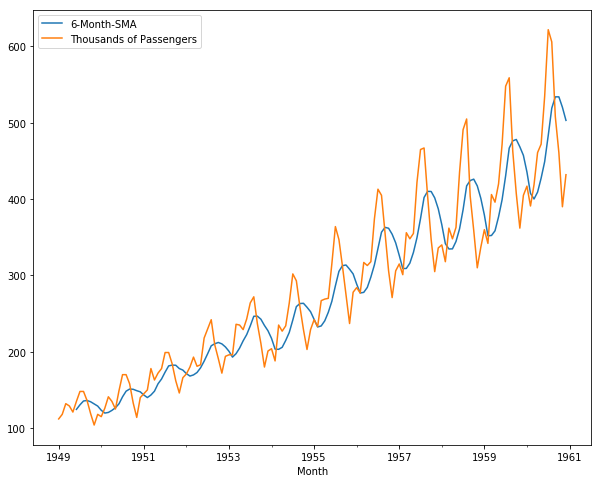

In [19]:
air_orig_df[['6-Month-SMA','Thousands of Passengers']].plot(figsize=(10,8))

In [20]:
air_orig_df['12-Month-SMA'] = air_orig_df['Thousands of Passengers'].rolling(window=12).mean()

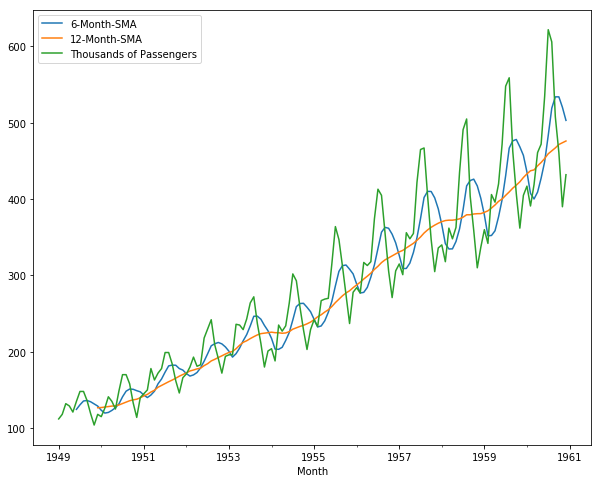

In [21]:
air_orig_df[['6-Month-SMA','12-Month-SMA','Thousands of Passengers']].plot(figsize=(10,8))

Observed that if we increase the rolling windows size Moving Average became flat though there is high speak in recent data

SMA has some weakness:
    
* It will always lag by the size of the window > In Above graph See 6-month-SMA - Blue line, 12-Month-SMA -Orange line - Starting point is delay
* It will never reach to full peak or valley of the data due to the averaging > Observe Amplitude of blue & Orange line
* It treats all data equally though recent data has significant impact on future